# Предсказание оттока пользователей

Данный проект посвещён построению предсказательной модели, определяющей вероятность оттока пользователей.

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Data load from gdrive

In [3]:
!pip install gdown

In [4]:
import gdown
gdown.download(id='1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K', output='train.csv')
gdown.download(id='1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r', output='test.csv')
gdown.download(id='1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r', output='submission.csv')

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: D:\Projects\Python\DLS_ml_course\train.csv
100%|██████████| 664k/664k [00:00<00:00, 4.82MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: D:\Projects\Python\DLS_ml_course\test.csv
100%|██████████| 218k/218k [00:00<00:00, 1.93MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: D:\Projects\Python\DLS_ml_course\submission.csv
100%|██████████| 218k/218k [00:00<00:00, 1.79MB/s]


'submission.csv'

### Data view, basic data clean

#### First look on data

In [5]:
data = pd.read_csv('../train.csv')

In [7]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4988,47,98.75,4533.7,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,1
4435,5,75.55,413.65,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
3731,18,25.30,454.65,Female,0,No,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2135,6,20.40,107.6,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),0
4912,5,55.80,300.4,Female,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),0
4212,1,80.55,80.55,Male,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1
2021,26,20.65,595.5,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),0
2373,62,96.10,6001.45,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Electronic check,0
3327,36,74.90,2659.45,Female,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
4665,2,91.15,168.5,Female,0,No,No,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0


In [61]:
# Make arrays for numeric and categorical columns, and for target

num_cols = [
    "ClientPeriod",
    "MonthlySpending",
    "TotalSpent",
]

cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod"
]

feature_cols = num_cols + cat_cols
target_col = "Churn"

#### Basic data clean

In [9]:
print(data[num_cols + [target_col]].describe())
print(data.info())

       ClientPeriod  MonthlySpending        Churn
count   5282.000000      5282.000000  5282.000000
mean      32.397009        64.924754     0.262022
std       24.550326        30.176464     0.439776
min        0.000000        18.250000     0.000000
25%        9.000000        35.462500     0.000000
50%       29.000000        70.400000     0.000000
75%       55.000000        90.050000     1.000000
max       72.000000       118.750000     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6 

Note that `ClientPeriod` min is 0, these lines might be errors.

In [10]:
data.isna().sum() # check if NaN present

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

`TotalSpent` is expecting to be a number, but it has object datatype. Lets fix that.

In [11]:
print(data["TotalSpent"].dtype)
print(data["TotalSpent"].head())
print(data["TotalSpent"].unique())

object
0    1026.35
1     1872.2
2       75.9
3       2570
4    6758.45
Name: TotalSpent, dtype: object
['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']


In [12]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

In [13]:
print(data["TotalSpent"].dtype)
print(data["TotalSpent"].sample(10))

float64
5094      86.05
1136    2462.55
1765    4326.25
2694    2227.10
226     1587.55
313     1815.65
1050      93.85
5044    1494.50
1098     709.50
4429    6921.70
Name: TotalSpent, dtype: float64


In [14]:
data[num_cols + [target_col]].describe()

,ClientPeriod,MonthlySpending,TotalSpent,Churn
count,5282.000000,5282.000000,5273.000000,5282.000000
mean,32.397009,64.924754,2291.390461,0.262022
std,24.550326,30.176464,2269.014233,0.439776
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.462500,401.100000,0.000000
50%,29.000000,70.400000,1410.250000,0.000000
75%,55.000000,90.050000,3807.350000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


Let's check the transformation to numeric happened as expected (no NaN generated).

In [15]:
print(data[data["TotalSpent"].isna()])

      ClientPeriod  MonthlySpending  TotalSpent     Sex  IsSeniorCitizen  \
1048             0            25.75         NaN    Male                0   
1707             0            73.35         NaN  Female                0   
2543             0            19.70         NaN    Male                0   
3078             0            80.85         NaN  Female                0   
3697             0            20.00         NaN  Female                0   
4002             0            61.90         NaN    Male                0   
4326             0            25.35         NaN    Male                0   
4551             0            52.55         NaN  Female                0   
4598             0            56.05         NaN  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
1048        Yes      Yes             Yes                     Yes   
1707        Yes      Yes             Yes                     Yes   
2543        Yes      Yes           

In [16]:
# drop NaN, as they are in lines with client period == 0 (which seems to be an error in data)
data.dropna(subset=['TotalSpent'], inplace=True)

In [17]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlineTV  

## Data analysis

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

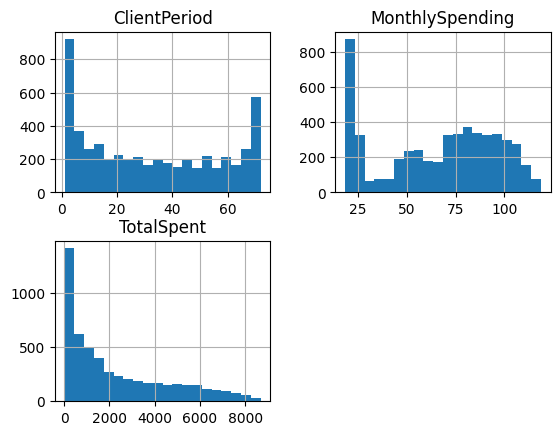

In [23]:
data[num_cols].hist(bins=20)

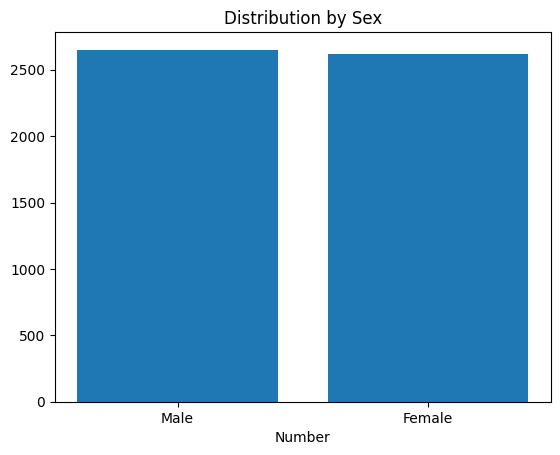

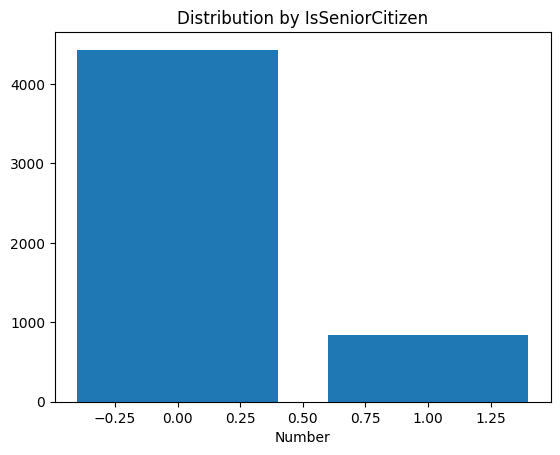

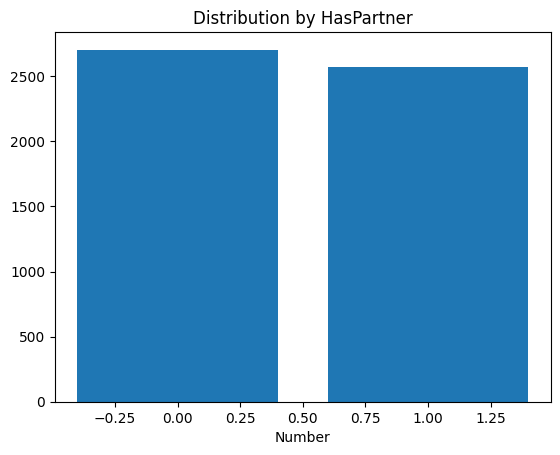

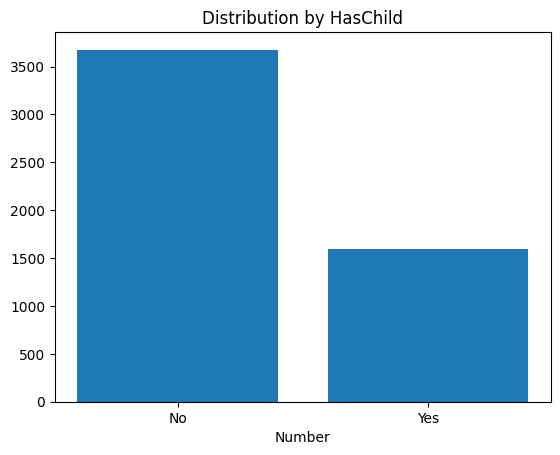

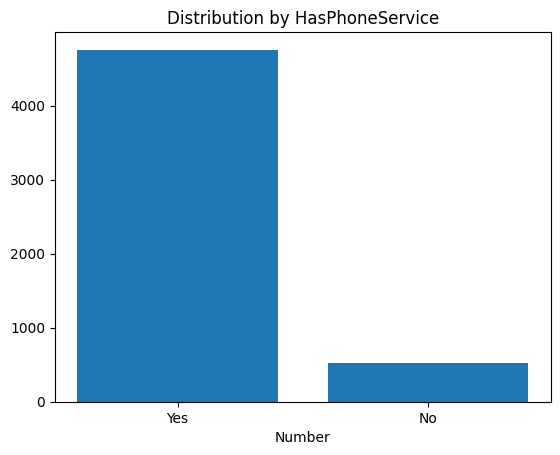

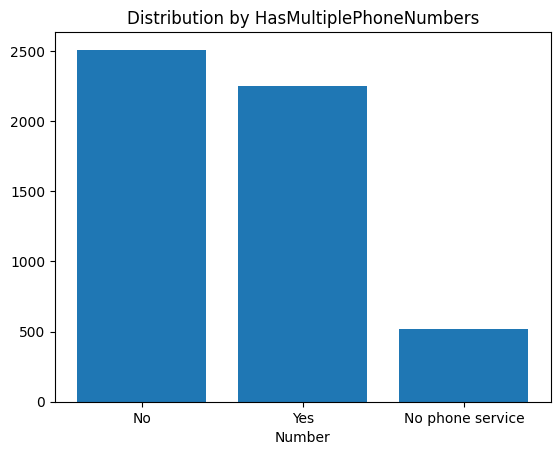

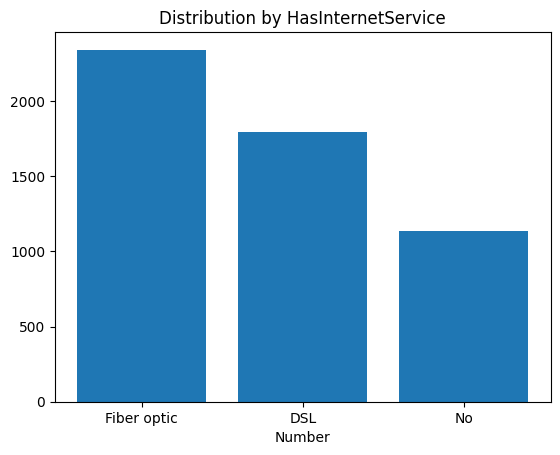

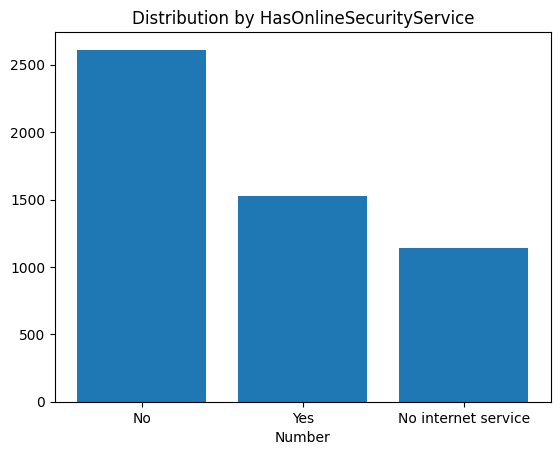

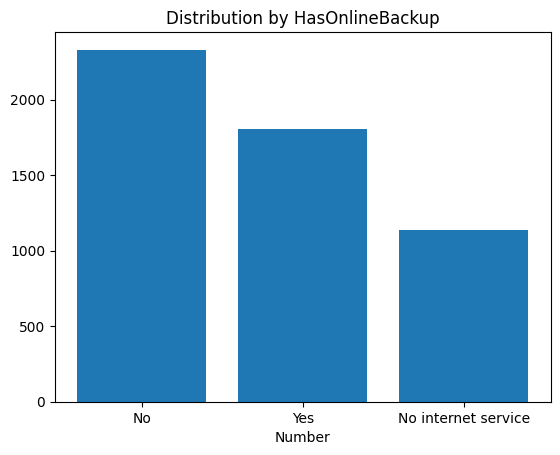

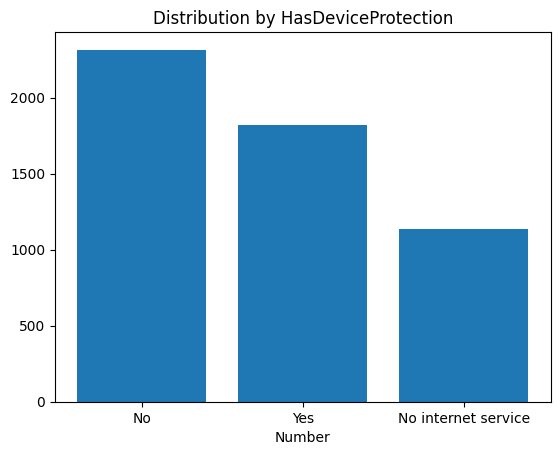

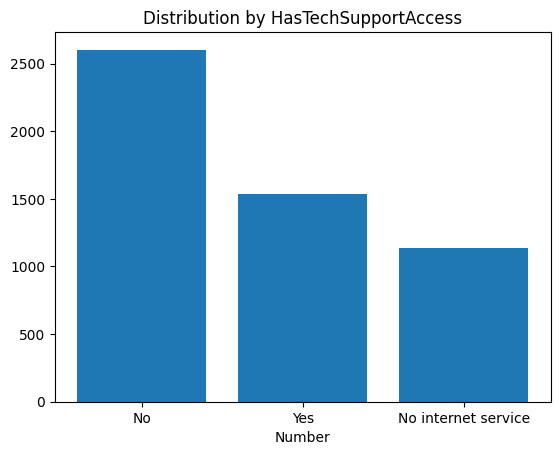

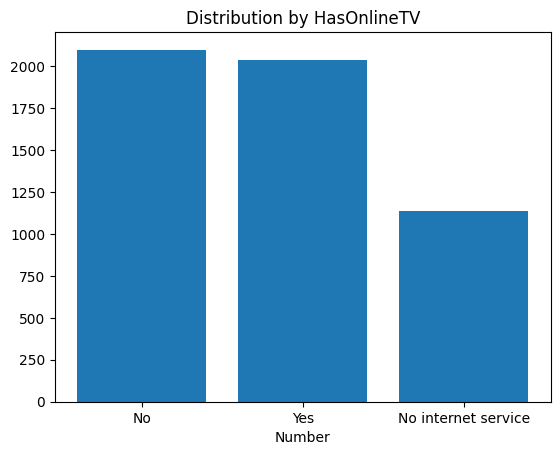

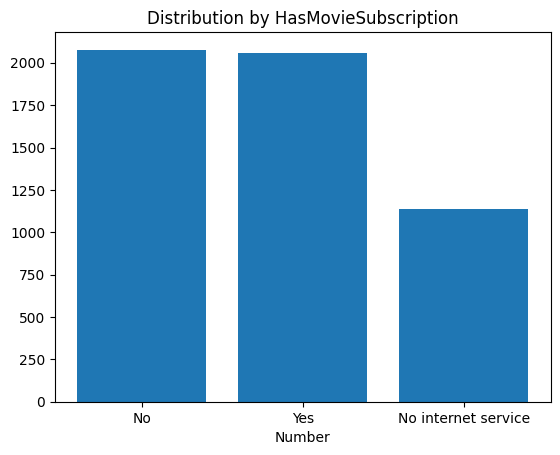

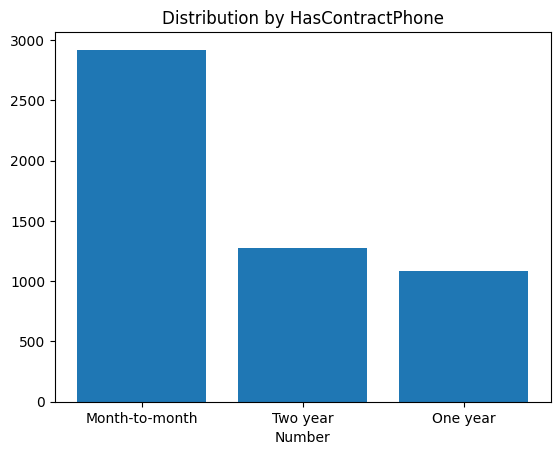

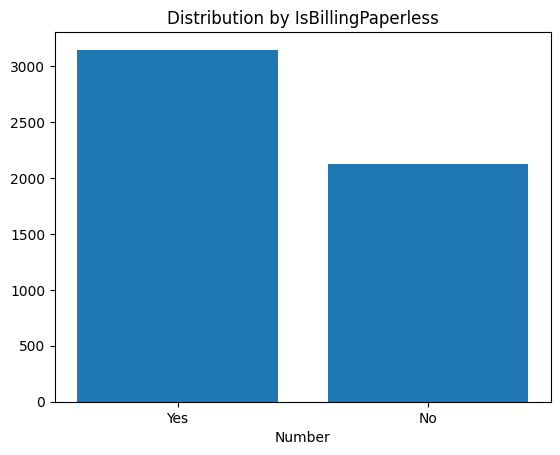

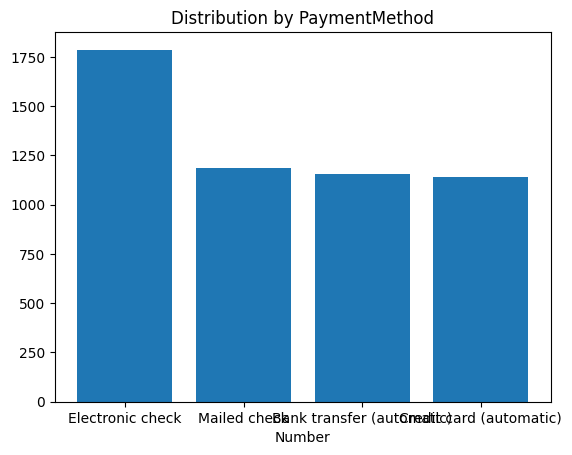

In [24]:
for cat_col in cat_cols:
    counts = data[cat_col].value_counts()

    plt.bar(counts.index, counts.values)
    plt.title(f'Distribution by {cat_col}')
    plt.xlabel(f'Value')
    plt.xlabel(f'Number')
    plt.show()

In [ ]:
counts = data[target_col].value_counts()

plt.bar(counts.index, counts.values)
plt.title(f'Distribution by target {target_col}')
plt.xlabel(f'Value')
plt.xlabel(f'Number')
plt.show()

#### Using Boxplot

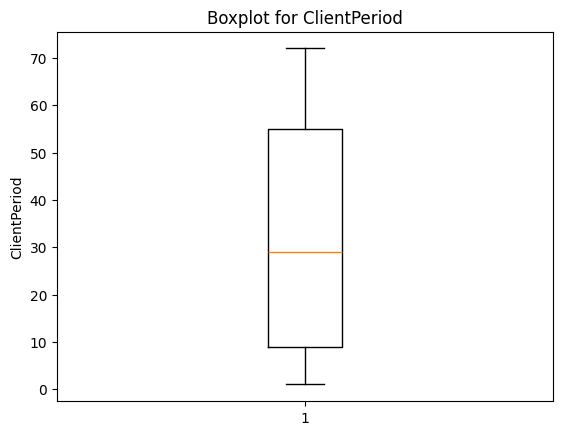

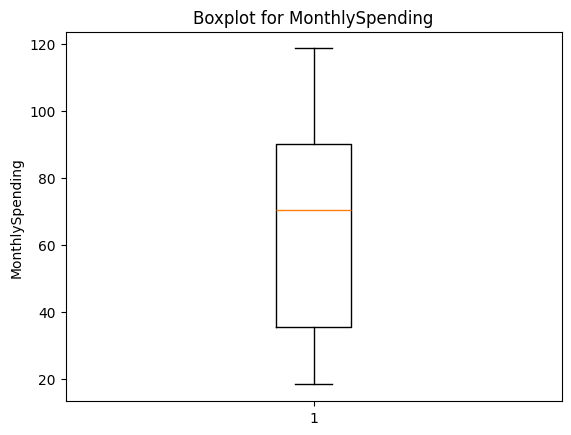

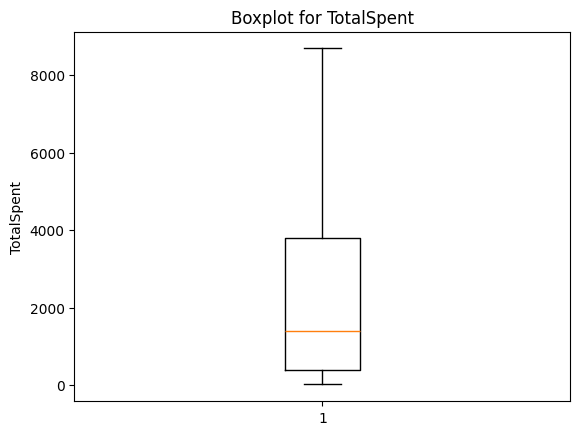

In [25]:
for num_col in num_cols:
    plt.boxplot(data[num_col])
    plt.title(f'Boxplot for {num_col}')
    plt.ylabel(num_col)
    plt.show()

In [26]:
Q1 = data['TotalSpent'].quantile(0.25)
Q3 = data['TotalSpent'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Upper bound: {upper_bound}")

max_spent = data['TotalSpent'].max()
print(f"Max value of TotalSpent: {max_spent}")

outliers = data[data['TotalSpent'] > upper_bound]
print("Outliers:")
print(outliers)

# Check all values above Q3
above_Q3 = data[data['TotalSpent'] > Q3]
print("Values above Q3:")
print(above_Q3)

Q1: 401.1
Q3: 3807.35
IQR: 3406.25
Upper bound: 8916.725
Максимальное значение TotalSpent: 8684.8
Выбросы:
Empty DataFrame
Columns: [ClientPeriod, MonthlySpending, TotalSpent, Sex, IsSeniorCitizen, HasPartner, HasChild, HasPhoneService, HasMultiplePhoneNumbers, HasInternetService, HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection, HasTechSupportAccess, HasOnlineTV, HasMovieSubscription, HasContractPhone, IsBillingPaperless, PaymentMethod, Churn]
Index: []
Значения выше Q3:
      ClientPeriod  MonthlySpending  TotalSpent     Sex  IsSeniorCitizen  \
4               60           115.25     6758.45  Female                0   
8               50           105.95     5341.80    Male                0   
9               72            61.20     4390.25    Male                0   
11              70           113.05     7869.05  Female                0   
12              69            99.50     6841.45    Male                0   
...            ...              ...         ...     .

In [27]:
data[num_cols + [target_col]].corr().style.background_gradient(cmap='coolwarm')

,ClientPeriod,MonthlySpending,TotalSpent,Churn
ClientPeriod,1.000000,0.248583,0.826332,-0.352613
MonthlySpending,0.248583,1.000000,0.652034,0.184341
TotalSpent,0.826332,0.652034,1.000000,-0.201294
Churn,-0.352613,0.184341,-0.201294,1.000000


## Applying linear models

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

#### Train/test split

In [29]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
X_train, y_train = data_train.iloc[:, :-1], data_train.iloc[:, -1]
X_test, y_test = data_test.iloc[:, :-1], data_test.iloc[:, -1]

In [30]:
X_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
2983,69,24.60,1678.05,Female,0,0,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
4163,22,50.60,1073.30,Female,0,0,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
5099,45,54.65,2553.70,Male,0,1,Yes,Yes,No,DSL,Yes,No,No,Yes,No,No,Two year,No,Bank transfer (automatic)
295,4,70.90,273.00,Female,0,0,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
1122,12,21.05,235.80,Male,0,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic)


In [31]:
y_train.head()

2983    0
4163    0
5099    0
295     1
1122    0
Name: Churn, dtype: int64

#### Scaling using StandartScaler

In [32]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [33]:
# Check scaling

print(X_train[num_cols].mean())
print(X_train[num_cols].std())
None

ClientPeriod      -1.570842e-16
MonthlySpending   -8.085835e-17
TotalSpent        -3.621780e-17
dtype: float64
ClientPeriod       1.000119
MonthlySpending    1.000119
TotalSpent         1.000119
dtype: float64


In [34]:
X_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
2983,1.500063,-1.337732,-0.264924,Female,0,0,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
4163,-0.414735,-0.475165,-0.532068,Female,0,0,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
5099,0.522294,-0.340803,0.121888,Male,0,1,Yes,Yes,No,DSL,Yes,No,No,Yes,No,No,Two year,No,Bank transfer (automatic)
295,-1.148062,0.198301,-0.885595,Female,0,0,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
1122,-0.822139,-1.455506,-0.902028,Male,0,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic)


#### Do one-hot-encoding for categorical features

In [35]:
X_train = pd.get_dummies(X_train, columns=cat_cols)
X_test = pd.get_dummies(X_test, columns=cat_cols)

In [36]:
X_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_0,HasPartner_1,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2983,1.500063,-1.337732,-0.264924,True,False,True,False,True,False,True,...,False,False,False,True,True,False,False,True,False,False
4163,-0.414735,-0.475165,-0.532068,True,False,True,False,True,False,True,...,True,True,False,False,False,True,False,False,True,False
5099,0.522294,-0.340803,0.121888,False,True,True,False,False,True,False,...,False,False,False,True,True,False,True,False,False,False
295,-1.148062,0.198301,-0.885595,True,False,True,False,True,False,True,...,False,True,False,False,False,True,True,False,False,False
1122,-0.822139,-1.455506,-0.902028,False,True,True,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [37]:
# Update cat_cols list

cat_cols_new = []
for cat_col in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(cat_col), data_train.columns))
cat_cols = cat_cols_new.copy()
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

#### Train linear regression with fixed hyperparameters

In [54]:
log_regression = LogisticRegression(
    penalty="l2",
    C=10,
    max_iter=100,
    n_jobs=-1
)

In [55]:
log_regression.fit(X_train, y_train)

LogisticRegression(C=10, n_jobs=-1)

In [56]:
from sklearn.metrics import roc_auc_score

y_predictions = log_regression.predict(X_test)
print(f'ROC-AUC: {roc_auc_score(y_test, y_predictions)}')

ROC-AUC: 0.7113706062750649


Resulting ROC-AUC: 0.7113706062750649

### Making a pipeline with GridSearchCV

In [41]:
X = data.drop(columns=['Churn'])
y = data['Churn']

In [42]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [44]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [45]:
from sklearn.pipeline import Pipeline

log_regression_pipeline = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(n_jobs=-1))
    ]
)

In [46]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0],
    'classifier__max_iter': [100, 200, 300, 500],
    'classifier__penalty': ['l2']
}

In [47]:
grid_search = GridSearchCV(log_regression_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('classifier',
                                        LogisticRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1.0, 10.0],
                         'classifier__max_iter': [100, 200, 300, 500],
                         'classifier__penalty': ['l2']},
             scoring='roc_auc')

In [48]:
y_predictions_new = grid_search.predict(X_test_new)
roc_auc_score(y_test_new, y_predictions_new)

np.float64(0.7113706062750649)

In [53]:
grid_search.best_params_

{'classifier__C': 10.0,
 'classifier__max_iter': 100,
 'classifier__penalty': 'l2'}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Итоговое качество: 0.7113706062750649 (ROC_AUC)
Параметры:
+ C: 10.0
+ max_iter: 100
+ penalty: l2

## Using gradient boosting (CatBoost)

In [ ]:
!pip install catboost

In [70]:
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [69]:
X_test_boost

array([[50, 105.95, 5341.8, ..., 'Month-to-month', 'No',
        'Credit card (automatic)'],
       [72, 105.5, 7544.0, ..., 'Two year', 'Yes', 'Electronic check'],
       [8, 20.0, 141.6, ..., 'Two year', 'No', 'Mailed check'],
       ...,
       [18, 58.4, 964.9, ..., 'Month-to-month', 'Yes',
        'Credit card (automatic)'],
       [4, 105.65, 443.9, ..., 'One year', 'Yes', 'Electronic check'],
       [68, 89.6, 6127.6, ..., 'Month-to-month', 'Yes',
        'Bank transfer (automatic)']], shape=(1055, 19), dtype=object)

In [62]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,1,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,1,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,0,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,1,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,1,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [71]:
cat_cols_indices = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype=int)
num_cols_indices = np.array([0, 1, 2], dtype=int)

In [94]:
from catboost import CatBoostClassifier

cat_boost_classifier = CatBoostClassifier(n_estimators=200, cat_features=cat_cols_indices, eval_metric='AUC')
cat_boost_classifier.fit(X_train_boost, y_train_boost)

y_train_boost_predictions = cat_boost_classifier.predict_proba(X_train_boost)[:, -1]
y_test_boost_predictions = cat_boost_classifier.predict_proba(X_test_boost)[:, -1]

Learning rate set to 0.083332
0:	total: 27.3ms	remaining: 5.44s
1:	total: 50.9ms	remaining: 5.04s
2:	total: 69.1ms	remaining: 4.54s
3:	total: 92.8ms	remaining: 4.55s
4:	total: 116ms	remaining: 4.52s
5:	total: 140ms	remaining: 4.51s
6:	total: 162ms	remaining: 4.48s
7:	total: 190ms	remaining: 4.55s
8:	total: 214ms	remaining: 4.54s
9:	total: 238ms	remaining: 4.53s
10:	total: 270ms	remaining: 4.64s
11:	total: 294ms	remaining: 4.6s
12:	total: 314ms	remaining: 4.52s
13:	total: 340ms	remaining: 4.52s
14:	total: 365ms	remaining: 4.51s
15:	total: 391ms	remaining: 4.5s
16:	total: 417ms	remaining: 4.49s
17:	total: 444ms	remaining: 4.48s
18:	total: 472ms	remaining: 4.49s
19:	total: 500ms	remaining: 4.5s
20:	total: 524ms	remaining: 4.47s
21:	total: 537ms	remaining: 4.34s
22:	total: 562ms	remaining: 4.33s
23:	total: 586ms	remaining: 4.3s
24:	total: 610ms	remaining: 4.27s
25:	total: 636ms	remaining: 4.26s
26:	total: 660ms	remaining: 4.23s
27:	total: 685ms	remaining: 4.21s
28:	total: 711ms	remaining: 

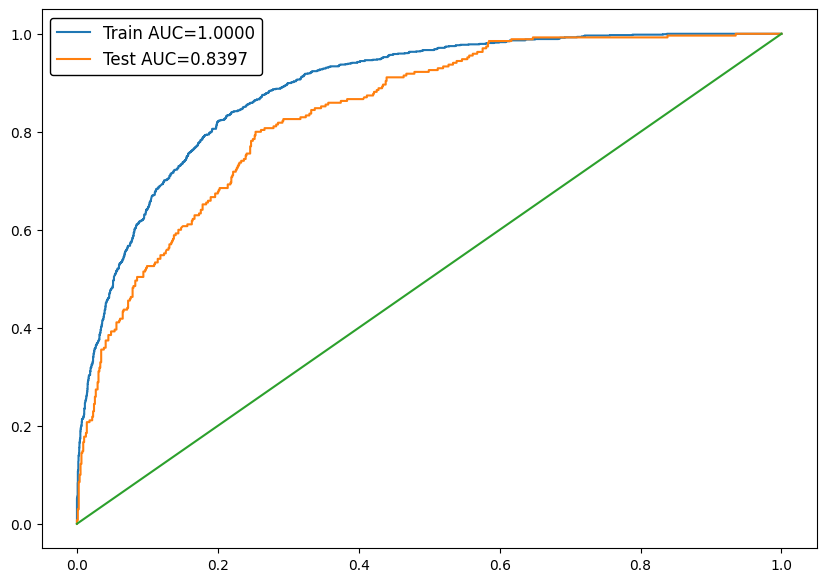

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

train_boost_auc = roc_auc_score(y_train, y_train_boost_predictions)
test_boost_auc = roc_auc_score(y_test, y_test_boost_predictions)

plt.figure(figsize=(10, 7))
plt.plot(*roc_curve(y_train_boost, y_train_boost_predictions)[:2], label='Train AUC={:.4f}'.format(train_boost_auc))
plt.plot(*roc_curve(y_test_boost, y_test_boost_predictions)[:2], label='Test AUC={:.4f}'.format(test_boost_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()


### CatBoost with GridSearchCV

In [96]:
catboost_param_grid = {
    'iterations': [100, 200, 400],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 7],
    'l2_leaf_reg': [3.0, 6.0],
}

In [101]:
grid_search_boosting = GridSearchCV(
    estimator=CatBoostClassifier(random_state=42, cat_features=cat_cols_indices, task_type='GPU'),
    param_grid=catboost_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=6,
)

In [ ]:
grid_search_boosting.fit(X_train_boost, y_train_boost)
best_boosting_model = grid_search_boosting.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
print(grid_search_boosting.best_params_)
# {'depth': 4, 'iterations': 110, 'l2_leaf_reg': 6.0, 'learning_rate': 0.1} for first attempt

In [ ]:
y_predictions_boosting = grid_search_boosting.predict_proba(X_test_boost)[:, 1]

In [ ]:
# A more subtle adjustment has been made:

catboost_param_grid = {
    'iterations': [90, 95, 100, 105, 110],
    'learning_rate': [0.09, 0.1, 0.11],
    'depth': [4],
    'l2_leaf_reg': [6.0],
}

# and fit again.

Resulting ROC-AUC: 0.8441188959660297

# Predictions on Kaggle

In [50]:
best_model = grid_search_boosting.best_estimator_

In [51]:
X_final_test = pd.read_csv('../test.csv')
submission = pd.read_csv('../submission.csv')

submission['Churn'] = best_model.predict_proba(X_final_test)[:, 1]


In [ ]:
submission.drop(columns=['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex', 'IsSeniorCitizen', 'HasPartner', "HasChild",
                         "HasPhoneService",
                         "HasMultiplePhoneNumbers",
                         "HasInternetService",
                         "HasOnlineSecurityService",
                         "HasOnlineBackup",
                         "HasDeviceProtection",
                         "HasTechSupportAccess",
                         "HasOnlineTV",
                         "HasMovieSubscription",
                         "HasContractPhone",
                         "IsBillingPaperless",
                         "PaymentMethod"], inplace=True)

In [ ]:
submission.head(10)

In [ ]:
submission.to_csv('./my_submission.csv')